In [1]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='retina'

import jax.numpy as jnp
from jax import grad, vmap, jit, value_and_grad
import jax
import jax.random

import optax

from functools import partial

import tqdm

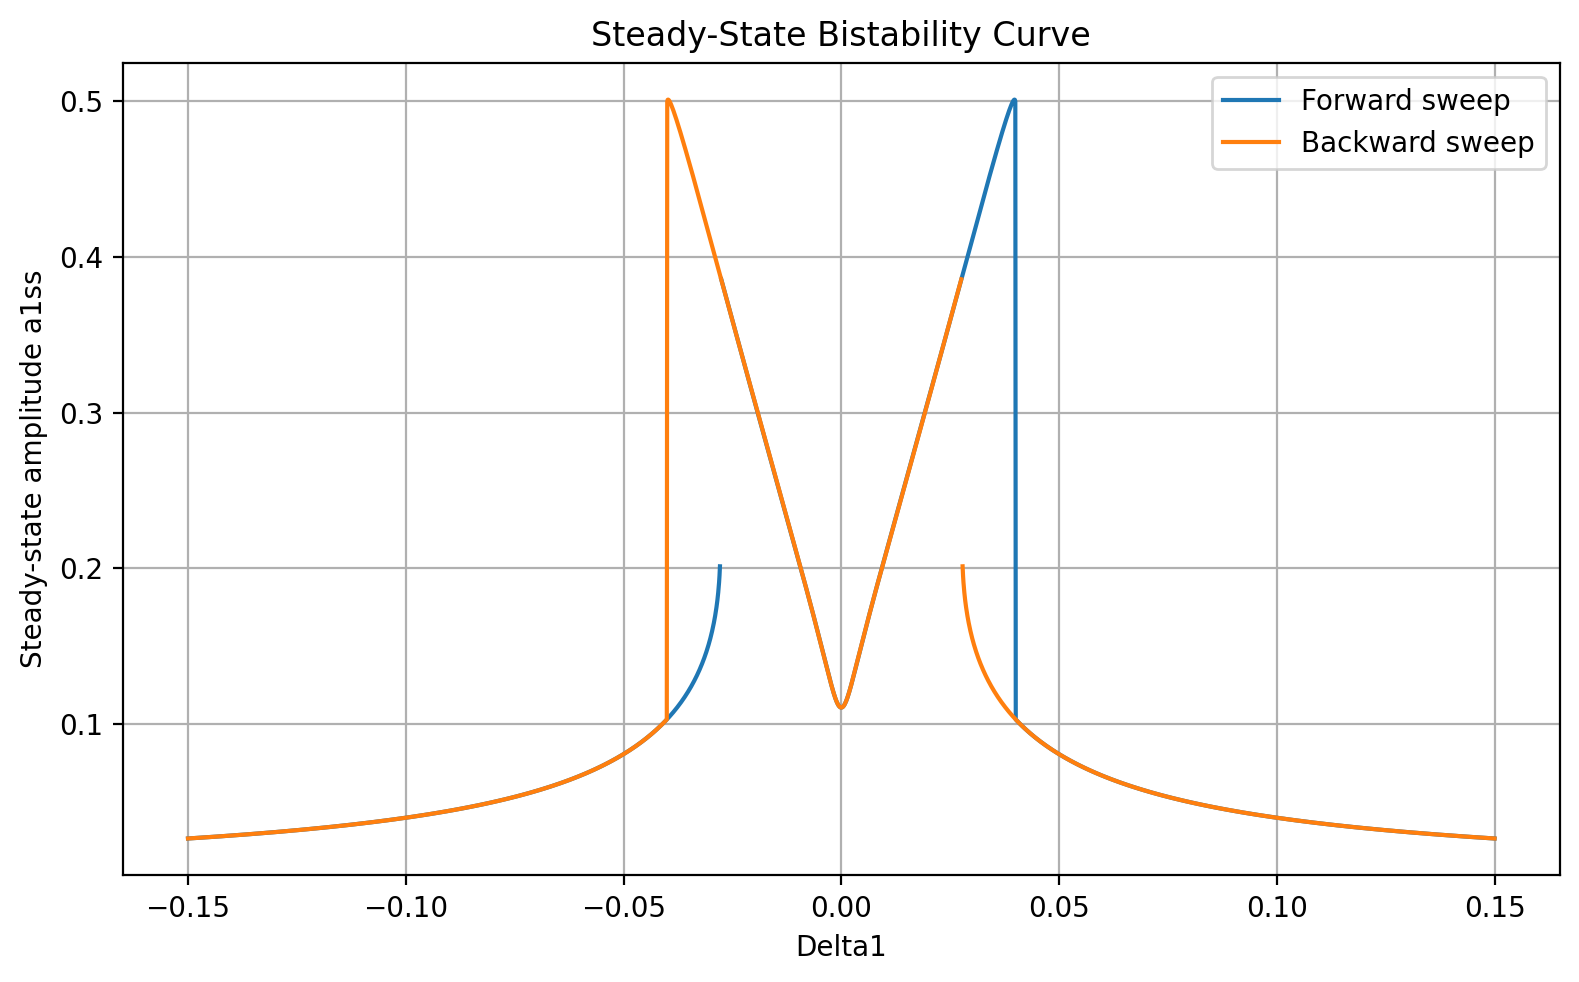

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

def fa1ss_scalar(a1, p):
    Delta1 = p[0]
    Delta2 = p[1] + 2 * p[0]
    k3 = p[2]
    k4 = p[3]
    Gamma1 = p[4]
    Gamma2 = p[5]
    omega_F = p[6]
    f = p[7]

    ReI = Delta1 - (k3 * k4 / (32 * omega_F**2)) * (Delta2 / (Gamma2**2 + Delta2**2)) * a1**2
    ImI = Gamma1 + (k3 * k4 / (32 * omega_F**2)) * (Gamma2 / (Gamma2**2 + Delta2**2)) * a1**2

    y = (f / (2 * omega_F)) * (ReI**2 + ImI**2)**(-0.5) - a1
    return y

def fa1ssP_scalar(a1, p, p0):
    Delta1 = p0
    Delta2 = p[1] + 2 * p0
    k3 = p[2]
    k4 = p[3]
    Gamma1 = p[4]
    Gamma2 = p[5]
    omega_F = p[6]
    f = p[7]

    ReI = Delta1 - (k3 * k4 / (32 * omega_F**2)) * (Delta2 / (Gamma2**2 + Delta2**2)) * a1**2
    ImI = Gamma1 + (k3 * k4 / (32 * omega_F**2)) * (Gamma2 / (Gamma2**2 + Delta2**2)) * a1**2

    y =  np.arctan2(ReI,ImI) 
    return y

# Initial parameter vector
p0 = np.array([0, 0.000, 1, 0.4, 0.0055, 0.005, 1, 0.008])

# Forward sweep
sx = np.linspace(-0.15, 0.15, 3000)
s = np.zeros_like(sx)
guess = 0.0

for k in range(len(sx)):
    p0[0] = sx[k]  # update Delta1

    sol = root_scalar(fa1ss_scalar, args=(p0,), x0=guess, x1=guess+0.01, method='secant')
    if sol.converged:
        s[k] = sol.root
        guess = sol.root
    else:
        s[k] = np.nan  # Mark as invalid if root finding failed

# Backward sweep
sx2 = np.linspace(0.15, -0.15, 3000)
s2 = np.zeros_like(sx2)
guess = 0.0

for k in range(len(sx2)):
    p0[0] = sx2[k]  # update Delta1

    sol = root_scalar(fa1ss_scalar, args=(p0,), x0=guess, x1=guess+0.01, method='secant')
    if sol.converged:
        s2[k] = sol.root
        guess = sol.root
    else:
        s2[k] = np.nan

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sx, s, label='Forward sweep')
plt.plot(sx2, s2, label='Backward sweep')
plt.xlabel('Delta1')
plt.ylabel('Steady-state amplitude a1ss')
plt.legend()
plt.grid(True)
plt.title('Steady-State Bistability Curve')
plt.tight_layout()
plt.show()


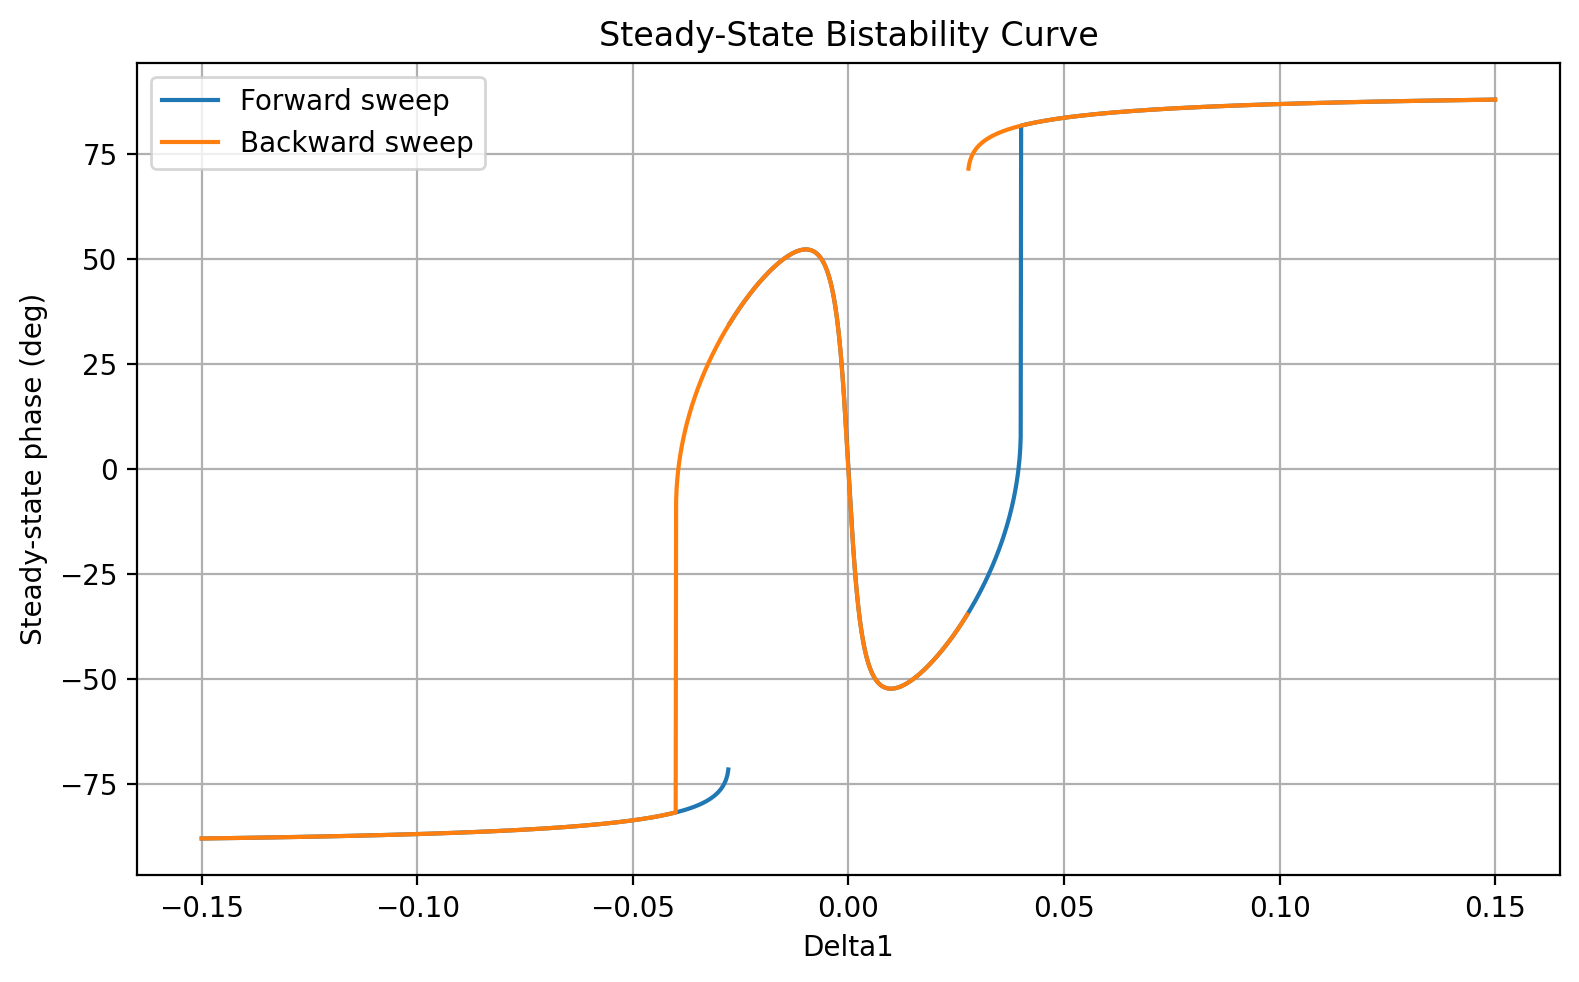

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot( sx,360/(2*np.pi)*fa1ssP_scalar(s,p0,sx), label='Forward sweep')
plt.plot( sx2, 360/(2*np.pi)*fa1ssP_scalar(s2,p0,sx2), label='Backward sweep')
plt.xlabel('Delta1')
plt.ylabel('Steady-state phase (deg)')
plt.legend()
plt.grid(True)
plt.title('Steady-State Bistability Curve')
plt.tight_layout()
plt.show()

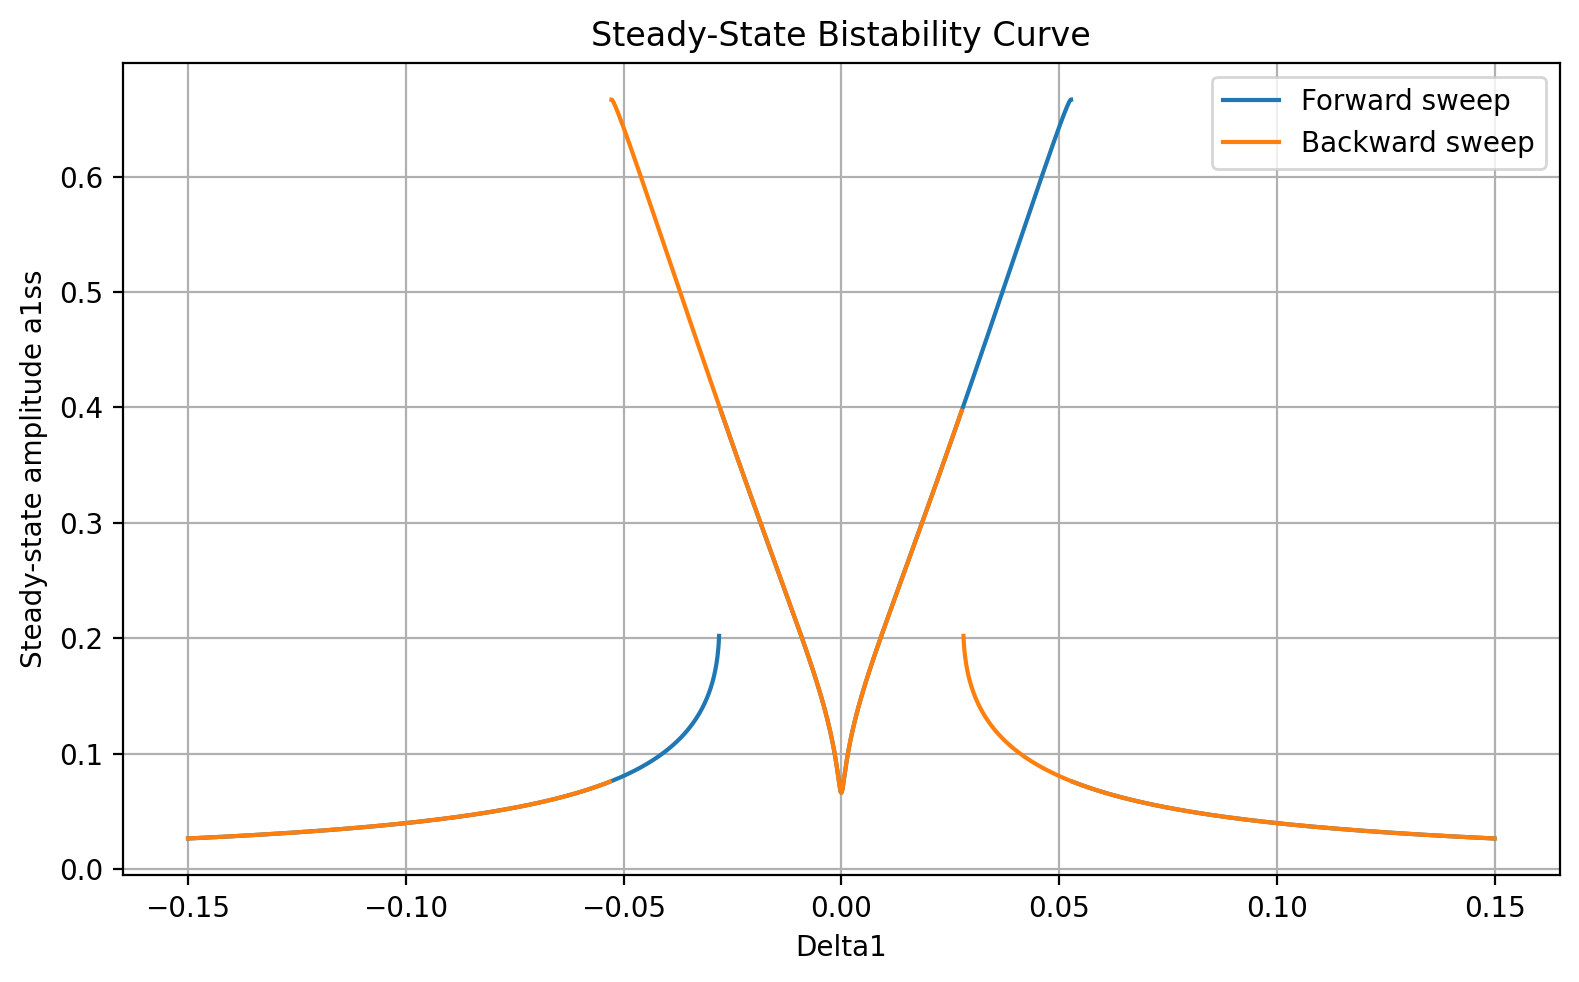

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

def fa1ss_scalar(a1, p):
    Delta1 = p[0]
    Delta2 = p[1] + 2 * p[0]
    k3 = p[2]
    k4 = p[3]
    Gamma1 = p[4]
    Gamma2 = p[5]
    omega_F = p[6]
    f = p[7]

    ReI = Delta1 - (k3 * k4 / (32 * omega_F**2)) * (Delta2 / (Gamma2**2 + Delta2**2)) * a1**2
    ImI = Gamma1 + (k3 * k4 / (32 * omega_F**2)) * (Gamma2 / (Gamma2**2 + Delta2**2)) * a1**2

    y = (f / (2 * omega_F)) * (ReI**2 + ImI**2)**(-0.5) - a1
    return y

# Initial parameter vector
p0 = np.array([0, 0.000, 1, 0.4, 0.0055, 0.001, 1, 0.008])

# Forward sweep
sx = np.linspace(-0.15, 0.15, 3000)
s = np.zeros_like(sx)
guess = 0.0

for k in range(len(sx)):
    p0[0] = sx[k]  # update Delta1

    sol = root_scalar(fa1ss_scalar, args=(p0,), x0=guess, x1=guess+0.01, method='secant')
    if sol.converged:
        s[k] = sol.root
        guess = sol.root
    else:
        s[k] = np.nan  # Mark as invalid if root finding failed

# Backward sweep
sx2 = np.linspace(0.15, -0.15, 3000)
s2 = np.zeros_like(sx2)
guess = 0.0

for k in range(len(sx2)):
    p0[0] = sx2[k]  # update Delta1

    sol = root_scalar(fa1ss_scalar, args=(p0,), x0=guess, x1=guess+0.01, method='secant')
    if sol.converged:
        s2[k] = sol.root
        guess = sol.root
    else:
        s2[k] = np.nan

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sx, s, label='Forward sweep')
plt.plot(sx2, s2, label='Backward sweep')
plt.xlabel('Delta1')
plt.ylabel('Steady-state amplitude a1ss')
plt.legend()
plt.grid(True)
plt.title('Steady-State Bistability Curve')
plt.tight_layout()
plt.show()


In [33]:
# Define value_ranges globally (or pass as argument if needed)
value_ranges = [
    [-0.005, 0.005],    # p[1] - imperfection
    [0.1, 1.0],         # p[3] - k4
    [0.005, 0.02],      # p[4] - Gamma1
    [0.0005, 0.005],    # p[5] - Gamma2
    [0.001, 0.02]       # p[7] - f
]

In [ ]:
import numpy as np
from scipy.optimize import root_scalar



def produce_bistability_training_batch(batchsize, npixels=200,
                                       detuning_range=[-0.15, 0.15],
                                       omega_F=1.0, k3=1.0,
                                       value_ranges=value_ranges):
    """
    Generate training data from forward and backward sweeps over Delta1.
    
    Parameters are drawn uniformly from value_ranges:
    [imperfection, k4, Gamma1, Gamma2, f]
    
    Returns:
    - x_forward: [batchsize, npixels]
    - x_backward: [batchsize, npixels]
    - y_target: [batchsize, 5] (imperfection, k4, Gamma1, Gamma2, f)
    """
    # Sample parameters from value_ranges
    param_samples = [
        np.random.uniform(low, high, batchsize) for (low, high) in value_ranges
    ]
    imperfection, k4s, gamma1s, gamma2s, fs = param_samples

    delta1_vals = np.linspace(*detuning_range, npixels)

    x_forward = np.zeros((batchsize, npixels))
    x_backward = np.zeros((batchsize, npixels))
    y_target = np.stack(param_samples, axis=1)

    for i in range(batchsize):
        # Parameters fixed for this sample
        imp = imperfection[i]
        k4 = k4s[i]
        g1 = gamma1s[i]
        g2 = gamma2s[i]
        f = fs[i]

        # Parameter vector base (Delta1 will be overwritten during sweep)
        p = np.array([
            0.0,    # Delta1 (swept)
            imp,    # Delta2 offset
            k3,
            k4,
            g1,
            g2,
            omega_F,
            f
        ])

        # --- Forward sweep
        guess = 0.0
        s = np.zeros(npixels)
        for k, delta1 in enumerate(delta1_vals):
            p[0] = delta1
            success = False
            for attempt in range(10):  # Try up to 2 times
                try:
                    sol = root_scalar(
                        fa1ss_scalar,
                        args=(p,),
                        x0=guess,
                        x1=guess + 0.001,
                        method='secant'
                    )
                    if sol.converged:
                        s[k] = sol.root
                        guess = sol.root
                        success = True
                        break
                    else:
                        guess = attempt*s[k-1] 
                except:
                    guess += 0.01  # Adjust guess if an exception occurs
            if not success:
                s[k] = s[k-1]#np.nan  # Still failed after retries, do not use nan keep the previous solution
        x_forward[i] = s

        # Sanity check: count NaNs and raise error if any

        # OLD CODE
        # s2 = np.zeros(npixels)
        # guess = 0.0
        # for k in range(npixels):
        #     Delta1 = detuning_range[::-1][k]
        #     p[0] = Delta1
        #     try:
        #         sol = root_scalar(fa1ss_scalar, args=(p,), x0=guess, x1=guess+0.01, method='secant')
        #         s2[k] = sol.root if sol.converged else np.nan
        #         guess = sol.root if sol.converged else guess
        #     except:
        #         s2[k] = np.nan
        # x_backward[i] = s2[::-1]  # flip back so detuning range is increasing

        # --- Backward sweep
        guess = 0.0
        s2 = np.zeros(npixels)
        for k, delta1 in enumerate(delta1_vals[::-1]):
            p[0] = delta1
            success = False
            for attempt in range(10):  # Try up to 10 times
                try:
                    sol = root_scalar(
                        fa1ss_scalar,
                        args=(p,),
                        x0=guess,
                        x1=guess + 0.001,
                        method='secant'
                    )
                    if sol.converged:
                        s2[k] = sol.root
                        guess = sol.root
                        success = True
                        break
                    else:
                        if k > 0:
                            guess = attempt * s2[k - 1]
                        else:
                            guess += 0.01
                except:
                    guess += 0.01  # Adjust guess if an exception occurs
            if not success:
                s2[k] = s2[k - 1] if k > 0 else 0.0  # Use previous value or fallback
        x_backward[i] = s2[::-1]  # Flip back so x-axis matches forward




    num_nans = np.isnan(x_forward[i]).sum()
    #print("Number of NaNs:", num_nans)
    if num_nans > 0:
        raise RuntimeError(f"Root finding failed at index {i} with {num_nans} NaNs.")

    num_nans = np.isnan(x_backward[i]).sum()
    #print("Number of NaNs:", num_nans)
    if num_nans > 0:
        raise RuntimeError(f"Root finding failed at index {i} with {num_nans} NaNs.")

    return x_forward, x_backward, y_target


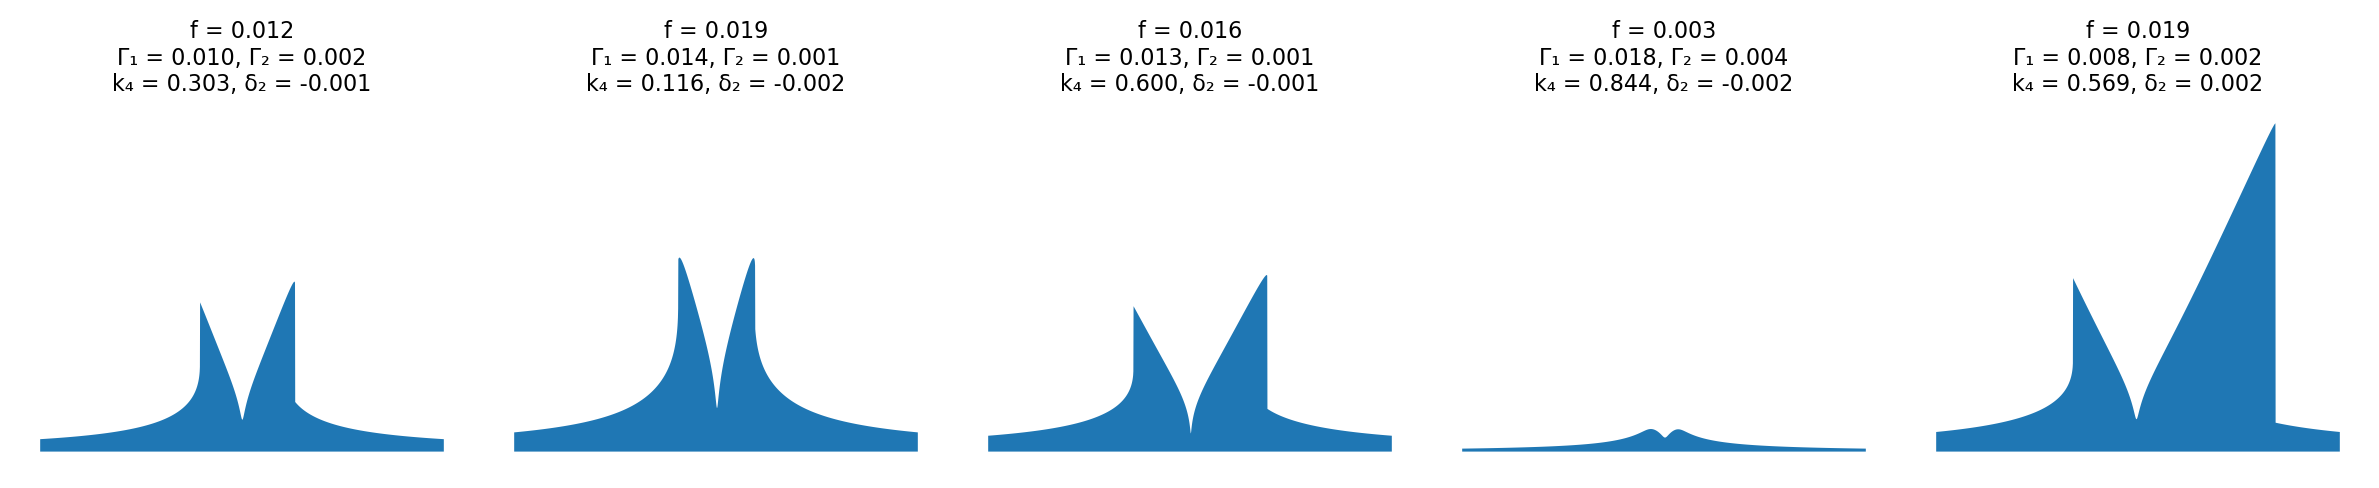

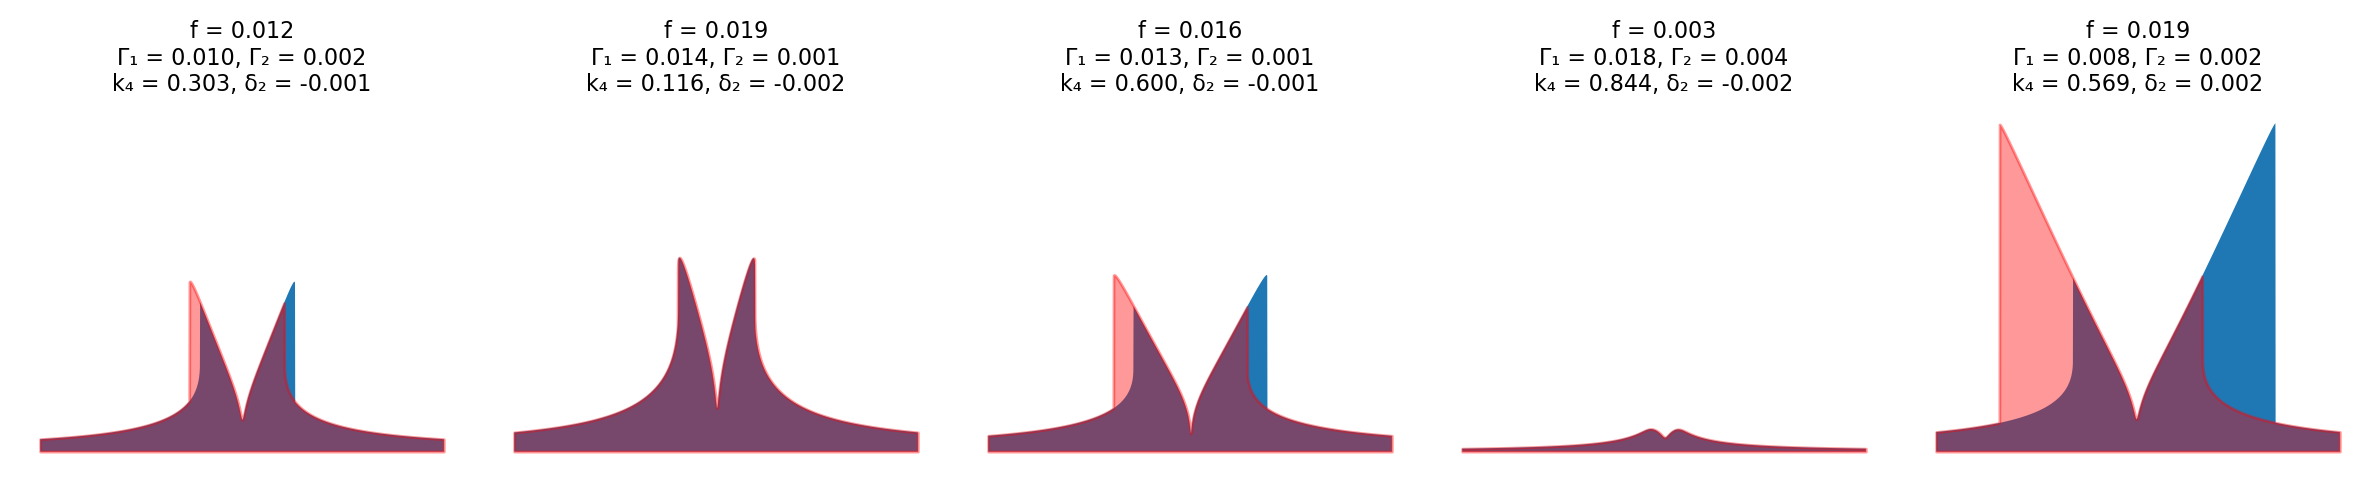

In [4]:
x_f, x_b, y_target = produce_bistability_training_batch(batchsize=6, npixels=2000,value_ranges=value_ranges)

num_panels = 5
omegas = np.linspace(-0.15, 0.15, x_f.shape[1])  # Detuning (Delta1) range

fig, ax = plt.subplots(ncols=num_panels, sharey=True, figsize=(12, 2.5))

for idx in range(num_panels):
    ax[idx].fill_between(omegas, 0 * omegas, x_f[idx, :], alpha=1, label="Forward")
    #ax[idx].fill_between(omegas[::-1], 0 * omegas, x_b[idx, :], alpha=0.4, label="Backward", color='red')
    
    #ax[idx].set_aspect(1.0)
    ax[idx].axis('off')
    
    # Unpack and annotate parameters
    imp, k4, Gamma1, Gamma2, f = y_target[idx, :]
    ax[idx].set_title(
        f"f = {f:.3f}\n"
        f"Γ₁ = {Gamma1:.3f}, Γ₂ = {Gamma2:.3f}\n"
        f"k₄ = {k4:.3f}, δ₂ = {imp:.3f}",
        fontsize=8
    )

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(ncols=num_panels, sharey=True, figsize=(12, 2.5))

for idx in range(num_panels):
    ax[idx].fill_between(omegas, 0 * omegas, x_f[idx, :], alpha=1, label="Forward")
    ax[idx].fill_between(omegas, 0 * omegas, x_b[idx, :], alpha=0.4, label="Backward", color='red')
    
    #ax[idx].set_aspect(1.0)
    ax[idx].axis('off')
    
    # Unpack and annotate parameters
    imp, k4, Gamma1, Gamma2, f = y_target[idx, :]
    ax[idx].set_title(
        f"f = {f:.3f}\n"
        f"Γ₁ = {Gamma1:.3f}, Γ₂ = {Gamma2:.3f}\n"
        f"k₄ = {k4:.3f}, δ₂ = {imp:.3f}",
        fontsize=8
    )

plt.tight_layout()
plt.show()


In [ ]:
def NN_init_params(key, num_neurons_layers):
    """
    Given a jax random key and a list of the neuron numbers
    in the layers of a network (simple fully connected network,
    i.e. 'multi-layer perceptron'), return a dictionary
    with the weights initialized randomly and biases set to zero.
    
    Returns: params, with params['weights'] a list of matrices and
    params['biases'] a list of vectors.
    """
    params = {}
    params['weights'] = []
    params['biases'] = []
    
    for lower_layer, higher_layer in zip( num_neurons_layers[:-1], num_neurons_layers[1:] ):
        key,subkey = jax.random.split( key )
        params['weights'].append( jax.random.normal( subkey,
                                        [higher_layer,lower_layer] ) /  
                                 jnp.sqrt( lower_layer ) )
        
    for num_neurons in num_neurons_layers[1:]:
        params['biases'].append( jnp.zeros( num_neurons) )
    
    return params
    
    
    
    
    
def NN(x, params):
    """
    Standard MLP with params['weights'] and params['biases'],
    applied to input vector x. Activation tanh applied to all
    layers except last.
    """
    num_layers=len(params['weights'])
    for layer_idx, (w, b) in enumerate(zip(params['weights'],params['biases'])):
        x = jnp.matmul(w,x) + b
        if layer_idx < num_layers-1:
            x = jnp.tanh( x )
    return x

# produce a batched version (where x has a batch dimension 0)
NN_batch = vmap(NN, in_axes=[0,None], out_axes=0)

# # batch-averaged mean-square-error deviation between network output and y_target:
# def mse_loss_batch(x, y_target, params):
#     return jnp.sum( ( NN_batch(x,params) - y_target )**2 ) / jnp.shape(x)[0]

# batch-averaged mean-square-error deviation between network output and y_target:
def mse_loss_batch(x_f, x_b, y_target, params):
    x_input = jnp.concatenate([x_f, x_b], axis=1)
    return jnp.sum( ( NN_batch(x_input,params) - y_target )**2 ) / jnp.shape(x_input)[0]

# take gradient with respect to params (argument number '2' out of 0,1,2)
# also return value of loss. Apply jit to compile it:
mse_loss_batch_val_grad = jax.jit( value_and_grad(mse_loss_batch, argnums=3) )
    
#only forward
#mse_loss_batch_val_grad = jax.jit( value_and_grad(mse_loss_batch, argnums=2) )
    




In [53]:
#     # Custom loss with optional forward/backward consistency penalty
# def mse_loss_with_consistency(x_f, x_b, y_target, params, alpha=1.0):
#     x_input = jnp.concatenate([x_f, x_b], axis=1)
#     preds = NN_batch(x_input, params)
#     mse = jnp.mean((preds - y_target) ** 2)
#     consistency = jnp.mean((x_f - x_b) ** 2)
#     return mse + alpha * consistency

# # # JIT + gradient for training
# mse_loss_val_grad = jax.jit(value_and_grad(mse_loss_with_consistency, argnums=3))


# @jax.jit
# def mse_loss_batch_val_grad(x_f, x_b, y_target, params):
#     def loss_fn(p):
#         loss_f = mse_loss_batch(x_f, y_target, p)
#         loss_b = mse_loss_batch(x_b, y_target, p)
#         return 0.5 * (loss_f + loss_b)

#     return value_and_grad(loss_fn)(params)

In [106]:
# value_ranges for: [imperfection, k4, Gamma1, Gamma2, f]
value_ranges = [
    [-0.005, 0.005],   # p[1] - imperfection
    [0.1, 1.0],        # p[3] - k4 (nonlinearity)
    [0.005, 0.02],     # p[4] - Gamma1
    [0.0005, 0.005],   # p[5] - Gamma2
    [0.001, 0.02]      # p[7] - driving force
]

# Normalize and denormalize based on value_ranges
y_min = jnp.array([v[0] for v in value_ranges])
y_max = jnp.array([v[1] for v in value_ranges])

def normalize(y):
    return (y - y_min) / (y_max - y_min)

def denormalize(y_norm):
    return y_norm * (y_max - y_min) + y_min


# --- Training setup ---
num_training_batches = 12500
batchsize = 16
num_frequency_bins = 400
num_physics_parameters = 5  # Matches y_target dimensionality
input_dim = 2 * num_frequency_bins  # Forward + Backward spectra
#input_dim = 1 * num_frequency_bins  # Forward  spectra

learning_rate = 1e-4

# Initialize network
subkey, key = jax.random.split(jax.random.key(21))
params = NN_init_params(subkey, [input_dim, num_training_batches, num_physics_parameters])
optimizer = optax.adam(learning_rate)
opt_state = optimizer.init(params)


In [84]:
# --- Training loop ---
losses = []

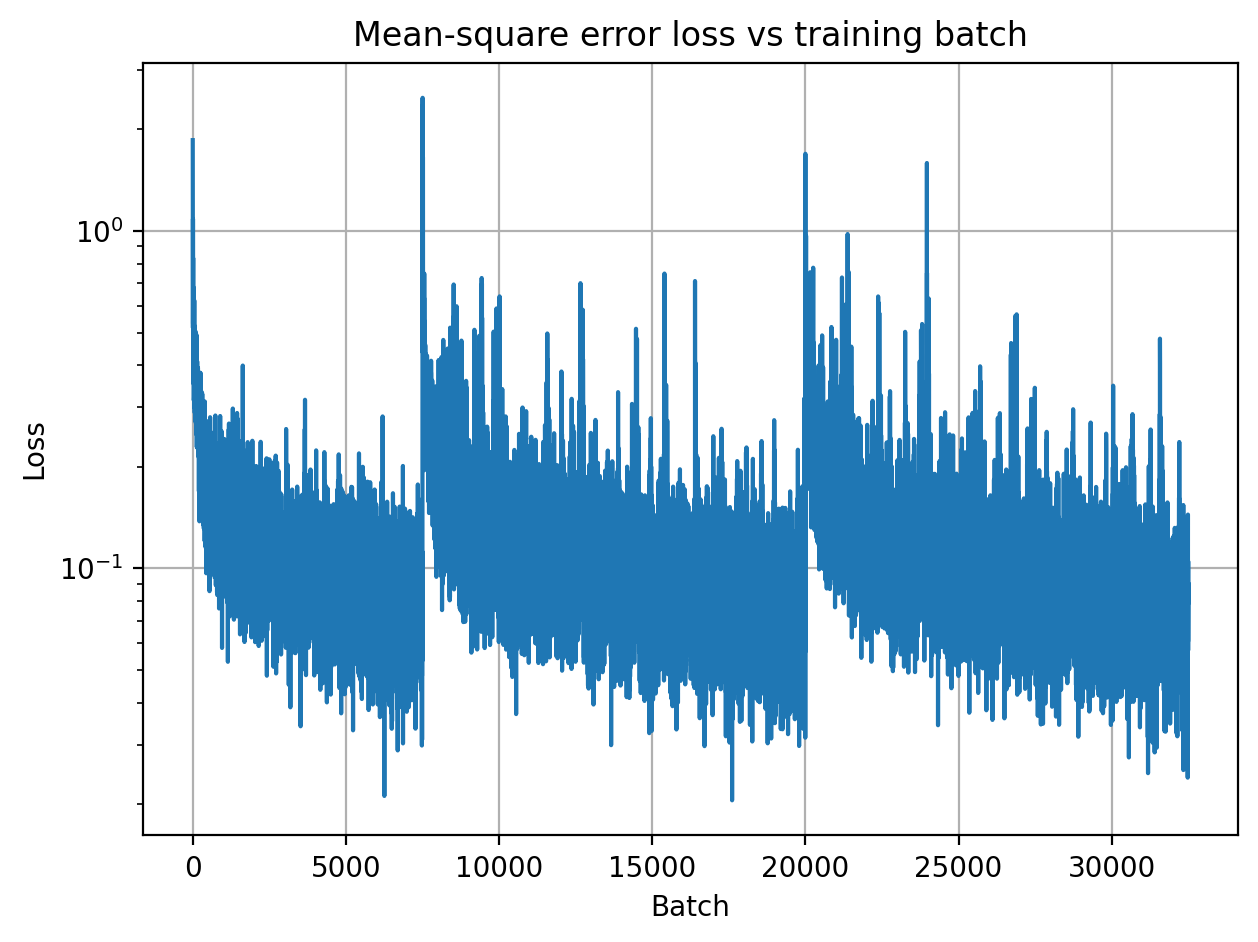

In [107]:

 

 
for idx_batch in range(num_training_batches):
    # Sample new training batch
    subkey, key = jax.random.split(key)
    x_f, x_b, y_target = produce_bistability_training_batch(
        batchsize=batchsize, npixels=num_frequency_bins,  value_ranges=value_ranges
    )

    # Compute loss and gradients
    # only forward
    #loss, grads = mse_loss_batch_val_grad(x_f, normalize(y_target), params)
    loss, grads = mse_loss_batch_val_grad( x_f, x_b, normalize(y_target), params )

    # Apply gradient update
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)

    # Track loss
    losses.append(loss)

# Plot loss curve
plt.plot(losses)
plt.yscale("log")
plt.title("Mean-square error loss vs training batch")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

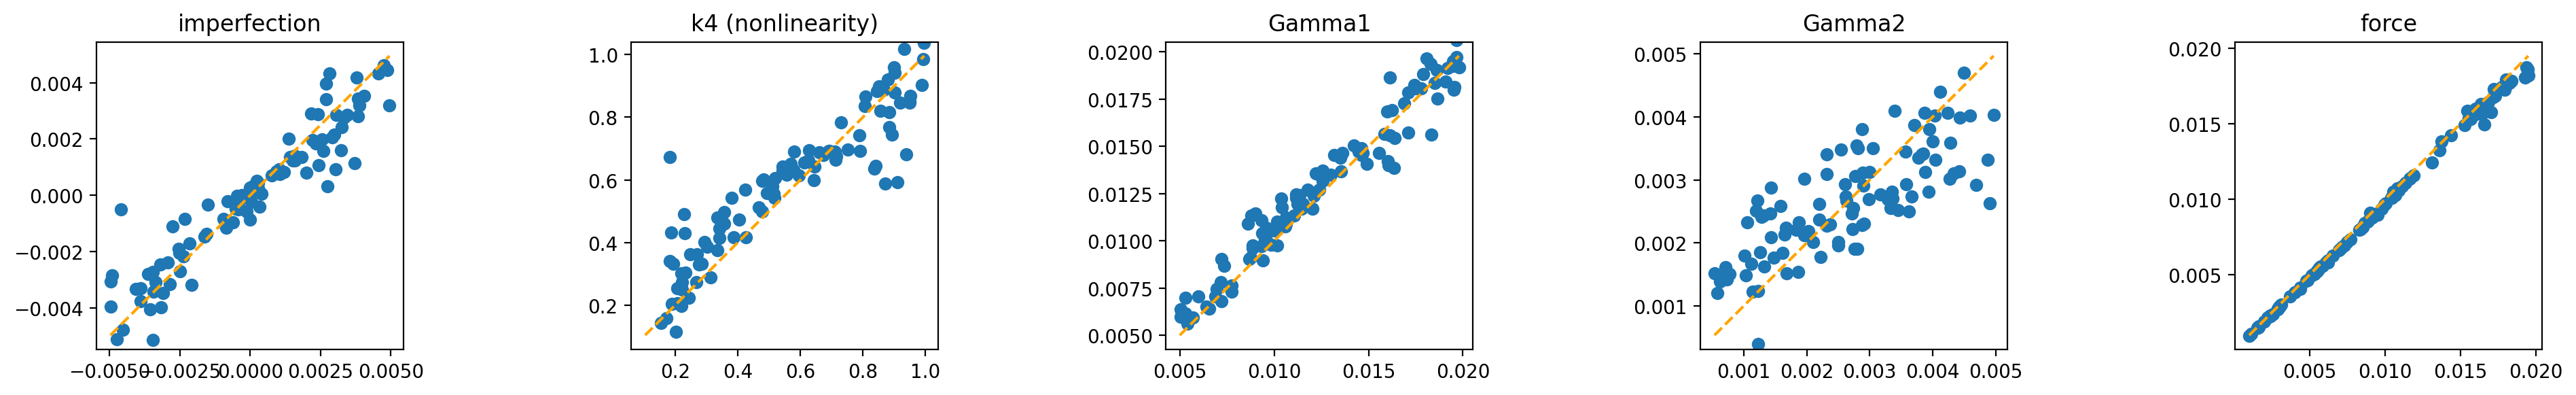

In [108]:
x_f, x_b, y_target = produce_bistability_training_batch(
        batchsize=100, npixels=num_frequency_bins,  value_ranges=value_ranges)

# only forward
# y = denormalize(NN_batch(x_f,params))

y = denormalize(NN_batch(jnp.concatenate([x_f, x_b], axis=1),params))

fig,ax = plt.subplots(ncols=5, figsize=(20,3))
for idx, label in enumerate(["imperfection","k4 (nonlinearity)","Gamma1","Gamma2","force"]):
    ax[idx].scatter(y_target[:,idx],y[:,idx])
    min_max_values=[jnp.min(y_target[:,idx]),jnp.max(y_target[:,idx])]
    ax[idx].plot(min_max_values,min_max_values,"--",color="orange")
    ax[idx].set_ylim(ax[idx].get_xlim())
    ax[idx].set_title(label)
    ax[idx].set_aspect(1.0)
fig.tight_layout()



In [115]:
num=2
#y_NN = denormalize(NN_batch(x_f[num:(num+1)],params))
y_NN =denormalize(NN_batch(jnp.concatenate([x_f[num:(num+1)], x_b[num:(num+1)]], axis=1),params))
 

imperfection,k4,Gamma1,Gamma2,force = y_NN[0]

In [116]:
value_ranges_val = [
    [imperfection, imperfection],    # p[1] - imperfection
    [k4, k4],         # p[3] - k4
    [Gamma1, Gamma1],      # p[4] - Gamma1
    [Gamma2, Gamma2],    # p[5] - Gamma2
    [force, force]       # p[7] - f
]

x_f_val, x_b_val, y_target_val = produce_bistability_training_batch(
        batchsize=1, npixels=num_frequency_bins,  value_ranges=value_ranges_val)

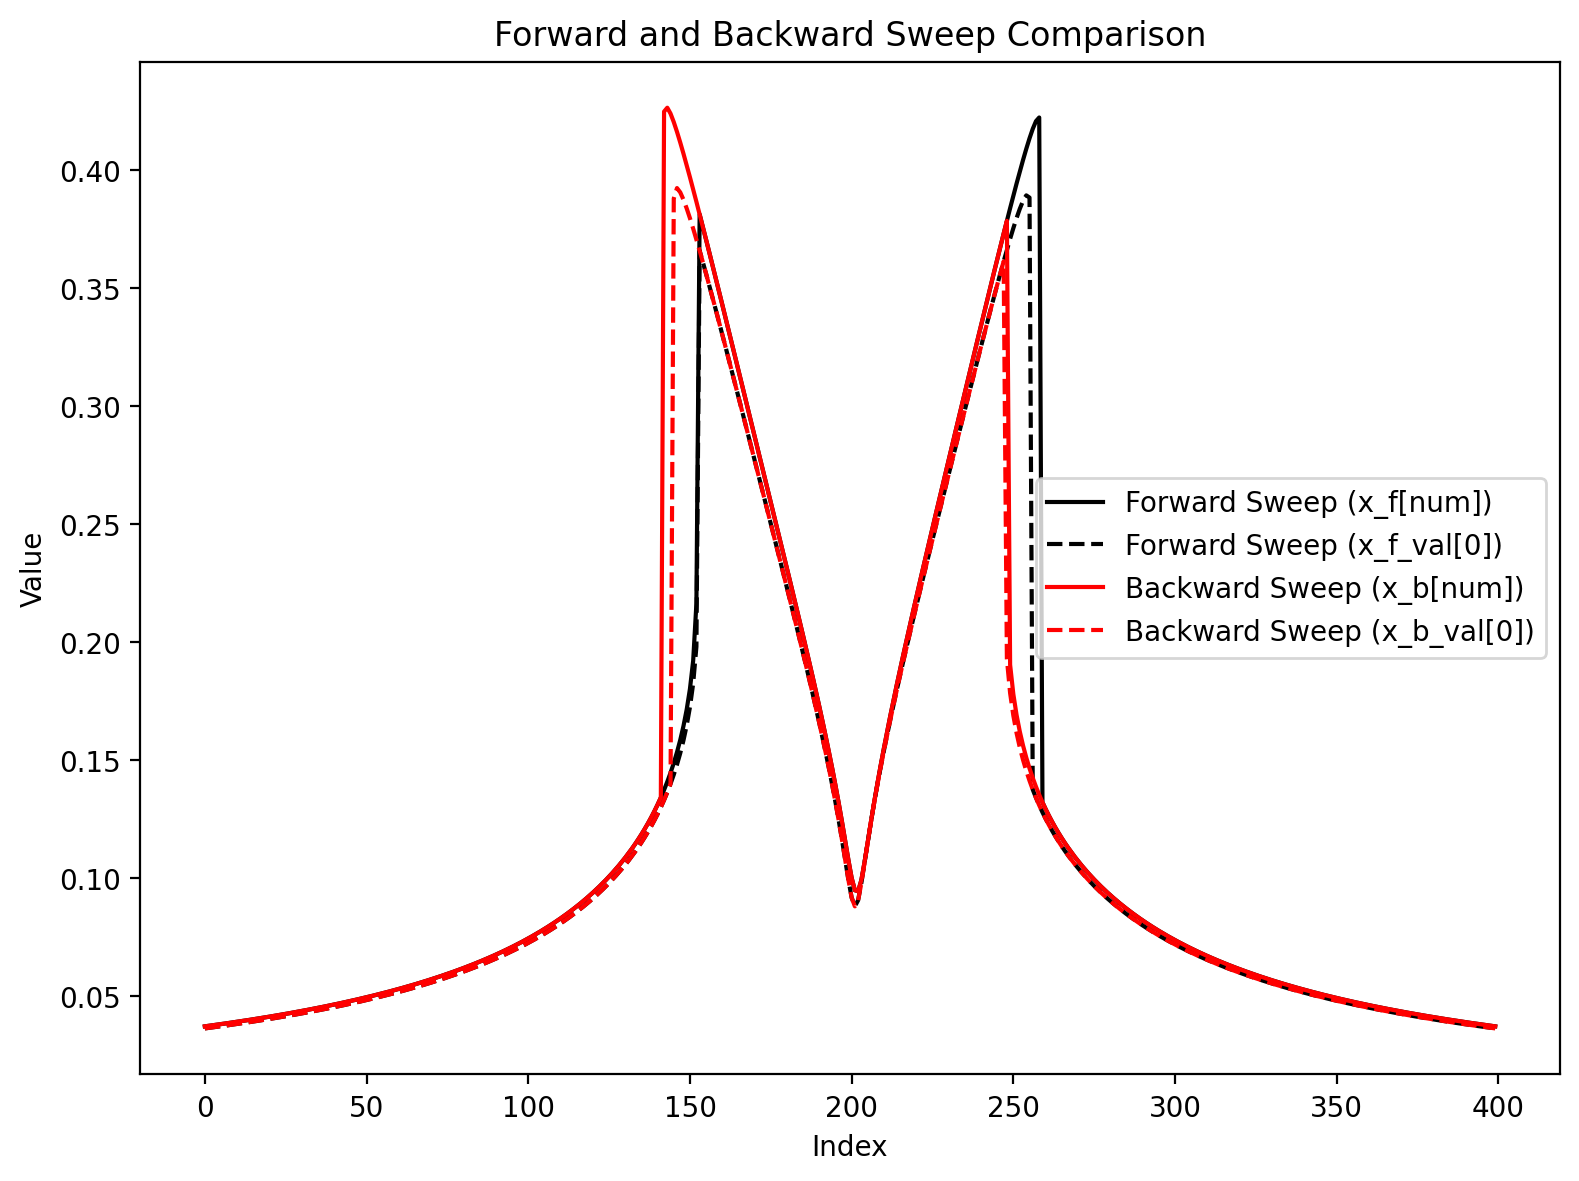

In [117]:
 

fig, ax = plt.subplots(figsize=(8, 6))

# --- Plot Forward sweep comparison (x_f[num] vs x_f_val[0])
ax.plot(x_f[num], label='Forward Sweep (x_f[num])',color='black')
ax.plot(x_f_val[0], label='Forward Sweep (x_f_val[0])', linestyle='--',color='black')

# --- Plot Backward sweep comparison (x_b[num] vs x_b_val[0])
ax.plot(x_b[num], label='Backward Sweep (x_b[num])',color='red')
ax.plot(x_b_val[0], label='Backward Sweep (x_b_val[0])', linestyle='--',color='red')

# --- Add Title, Labels, and Legend
ax.set_title("Forward and Backward Sweep Comparison")
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.legend()

# --- Adjust layout and show plot
fig.tight_layout()
plt.show()

In [118]:
import pickle

# Define a dictionary to store the data
output_data = {
    "params": params,
    "losses": losses,
    "grads": grads
}

# Save to a file
with open("training_output_5p_long_nowetalk.pkl", "wb") as f:
    pickle.dump(output_data, f)